In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data = data.drop("State" , axis = 1)
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [4]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [5]:
x = data.iloc[: , 0:3]
y = data.iloc[: , 3]

In [6]:
from sklearn.decomposition import PCA

In [7]:
def plot(data):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1])
    plt.show()

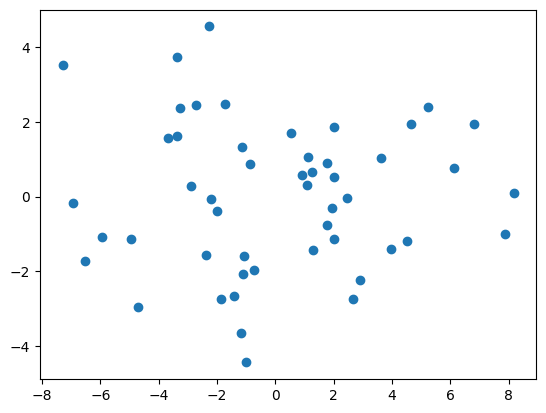

In [8]:
plot(data)

In [9]:
w = np.zeros(x.shape[1])
m = y.shape[0]
error = 1000
l = 0.001
count = 0

In [10]:
while error > (0.8):
  y_pred = np.dot (x, w.T )
  dw = (-1/m)*sum(np.dot((y-y_pred).T , x))
  w = w - l*dw
  error = (1/m)* sum ((y-y_pred)**2)
  count +=1

print ("Num of interations: ",count)

KeyboardInterrupt: ignored

In [11]:
print("Error=", error)
print ("w= ", w)

Error= 0.803158415206302
w=  [0.3732915 0.3732915 0.3732915]


In [12]:
y_pred = np.dot (x, w.T )
print (y_pred)

[10.02873574 10.14457765  8.4177399   8.50556986  7.64057223  7.6245752
  7.21759015  8.48406363  8.2800734   7.26555835  6.33935081  5.9798075
  6.75083348  6.94200067  8.07573646  7.13531684  6.38571505  7.45420706
  6.69271292  5.49036063  6.39665206  7.46829207  6.61190869  6.05534262
  4.91389452  5.67372673  5.97974988  7.05862758  6.66290173  5.81806492
  4.67442922  5.58408441  4.72965877  5.09999761  6.28576756  4.38184564
  5.0724332   3.41837026  3.22525377  3.9602159   4.65487512  3.71274487
  3.80264414  3.63422109  4.41988821  3.01741973  4.91283318  3.27187064
  1.14265292  3.12186574]


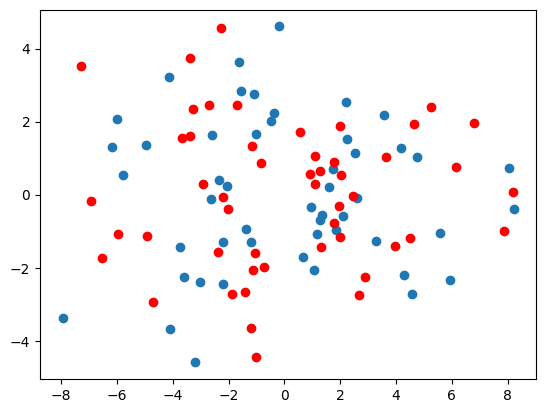

In [13]:
data_pred = np.vstack([x.T, y_pred])
matrix     = np.transpose(data_pred)
df = pd.DataFrame(matrix)

pca = PCA(n_components=2)
data_2d = pca.fit_transform(df)
plt.scatter(data_2d[:,0], data_2d[:,1] )

pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)
plt.scatter(data_2d[:,0], data_2d[:,1] , color = 'red')

plt.show()
